## Titanic Project
'Titanic: Machine Learning from Disaster' is the first thing you will see in the kaggle competition. This dataset is also widely used as an introductory example for machine learning online courses. <br><br> For those who are interested in doing by themselves, the dataset could be easily found here: https://www.kaggle.com/c/titanic/data

Let's take a look at the data description.
### Description of the dataset
The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

#### Variable Table
| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival |                  Survival                  |                 0 = No, 1 = Yes                |
|  pclass  |                Ticket class                |            1 = 1st, 2 = 2nd, 3 = 3rd           |
|    sex   |                     Sex                    |                                                |
|    age   |                Age in years                |                                                |
|   sibsp  | # of siblings / spouses aboard the Titanic |                                                |
|   parch  | # of parents / children aboard the Titanic |                                                |
|  ticket  |                Ticket number               |                                                |
|   fare   |               Passenger fare               |                                                |
|   cabin  |                Cabin number                |                                                |
| embarked |             Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |

#### Variable Notes

>pclass: Levels for socio-economic status
>> 1st = Upper<br>
>> 2nd = Middle<br>
>> 3rd = Lower

>age: Age is fractional if less than 1

>sibsp: The dataset defines family relations as <br>
>>Sibling = brother, sister, stepbrother, stepsister<br>
>>Spouse = husband, wife (mistresses and fiancés were ignored)

>parch: The dataset defines family relations as <br>
>>Parent = mother, father <br>
>>Child = daughter, son, stepdaughter, stepson<br>
>> * Some children travelled only with a nanny, therefore parch=0 for them.

### The Objective
We are tasked to analyze what sorts of people were likely to survive and to predict which passengers survived the tragedy applying the tools of machine learning.

In [1]:
%matplotlib inline  
%config InlineBackend.figure_format='retina'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Import Dataset
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


Training and testing set contain 891 and 418 observations respectively. We also observe some missing values in both of the dataset. Also, we see a huge outlier in ```Fare``` column. We will see if that is something we can adjust utilzing other variables. Notice that testing set does not contain ```Survived``` which is obvious since that's what we are trying to predict!

In [5]:
nullcounts = pd.concat([train_set.isnull().sum(), test_set.isnull().sum()], axis=1).rename(columns = {0 : "Train", 1 : "Test"})
nullcounts[nullcounts>0].dropna(thresh=1)

,Train,Test
Age,177.0,86.0
Cabin,687.0,327.0
Embarked,2.0,NaN
Fare,NaN,1.0


Training set contains some NaNs in variable ```Age```, A LOT in ```Cabin``` and couple in ```Embarked```.<br>Similarly, testing set contains some NaNs in ```Age```, A LOT in ```Cabin``` and one in ```Fare```. <br>

Can we characterize those NaNs to be missing at random? That is, are there some kind of pattern in missing values? We will need a further investigation on that.  Let's take a look into more detail for each variable. 

### Dealing with NaNs
In order to take a full use of both train and test set, I will combine train and test set into one and reset the index for right now. It facilitates both data exploration and manipulating process. The dataset will be recovered into original format when we need to apply models and test them.

In [6]:
combined = train_set.append(test_set)
combined = combined.reset_index()
combined.drop(['index'], axis = 1, inplace = True)
combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Since we don't have any missing values in ```Name``` column, we might be able to make use of it to make educated guess of NaNs in ```Age```. Each ```Name``` is composed of surname, title, first and last name. Let's extract ```Title```s from ```Name``` and drop the ```Name``` column.

In [7]:
combined['Title'] = combined['Name'].map( lambda name : name.split(',')[1].split('.')[0].strip())
combined['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

There are 18 ```Title```s but we can merge for those that are likely to have similar age range and come up with fewer ```Title```s.

In [8]:
def agg_titles(df):
    title = df['Title']
    if title in ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']:
        return 'Mr'
    elif title in ['the Countess', 'Mme', 'Lady','Dona']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    else:
        return title
combined['Title'] = combined.apply(agg_titles, axis = 1)
combined.drop('Name', axis = 1, inplace = True)

In [9]:
combined.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

Now we have 5 ```Title```s. There might be some discernible pattern when we plot ```Title``` against ```Age```. Let's plot it.

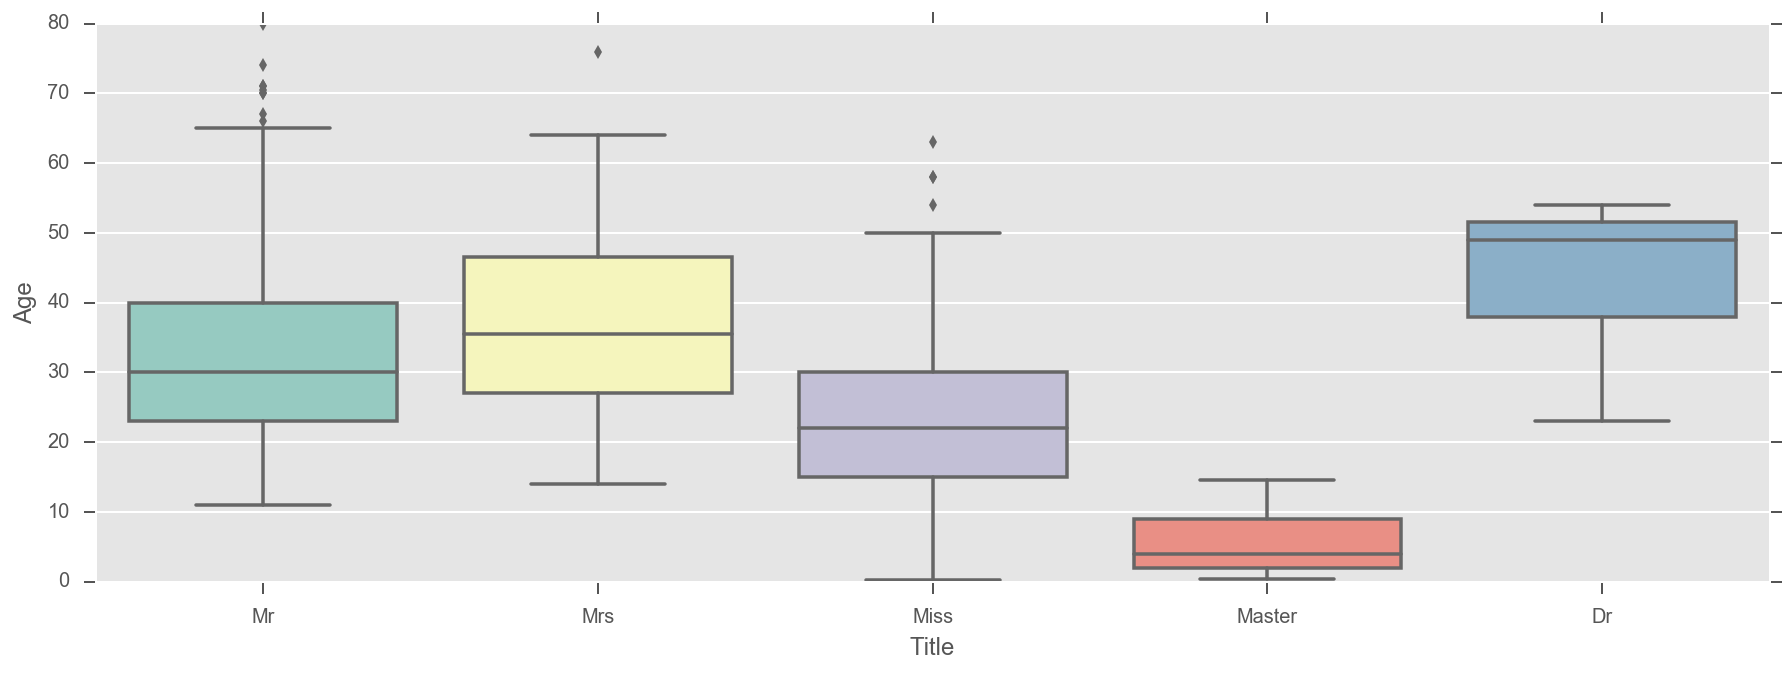

In [10]:
plt.figure(figsize=(15, 5))
sns.boxplot(x = 'Title', y = 'Age', data = combined, palette="Set3")

There are marked differences in ```Age``` distribution among different ```Title``` groups. But is it safe to impute the NaNs by average or median ```Age``` for each title? I don't think it is the best way of dealing with NaNs. Let's see how many NaNs are there in each ```Title```. 

In [11]:
for i in combined['Title'].unique():
    if combined[combined['Title'] == i].Age.isnull().sum() > 0:
        print("There are",combined[combined['Title'] == i].Age.isnull().sum(), "values missing in", i, 
              "among", len(combined[combined['Title']== i]))

There are 176 values missing in Mr among 775
There are 27 values missing in Mrs among 201
There are 51 values missing in Miss among 264
There are 8 values missing in Master among 61
There are 1 values missing in Dr among 8


To me, there seems too much of NaNs to simply impute by mean or median ```Age``` for each ```Title```. There might be other variables that might help us to make better guess on missing ```Age```s. We might get some insight by looking at the relationship between ```Age``` and ```Pclass``` or ```Embarked```. For instance, older passengers might be more likely to be classified as 'upper' socio economic class than younger ones. To make it sure, we will visualize it.

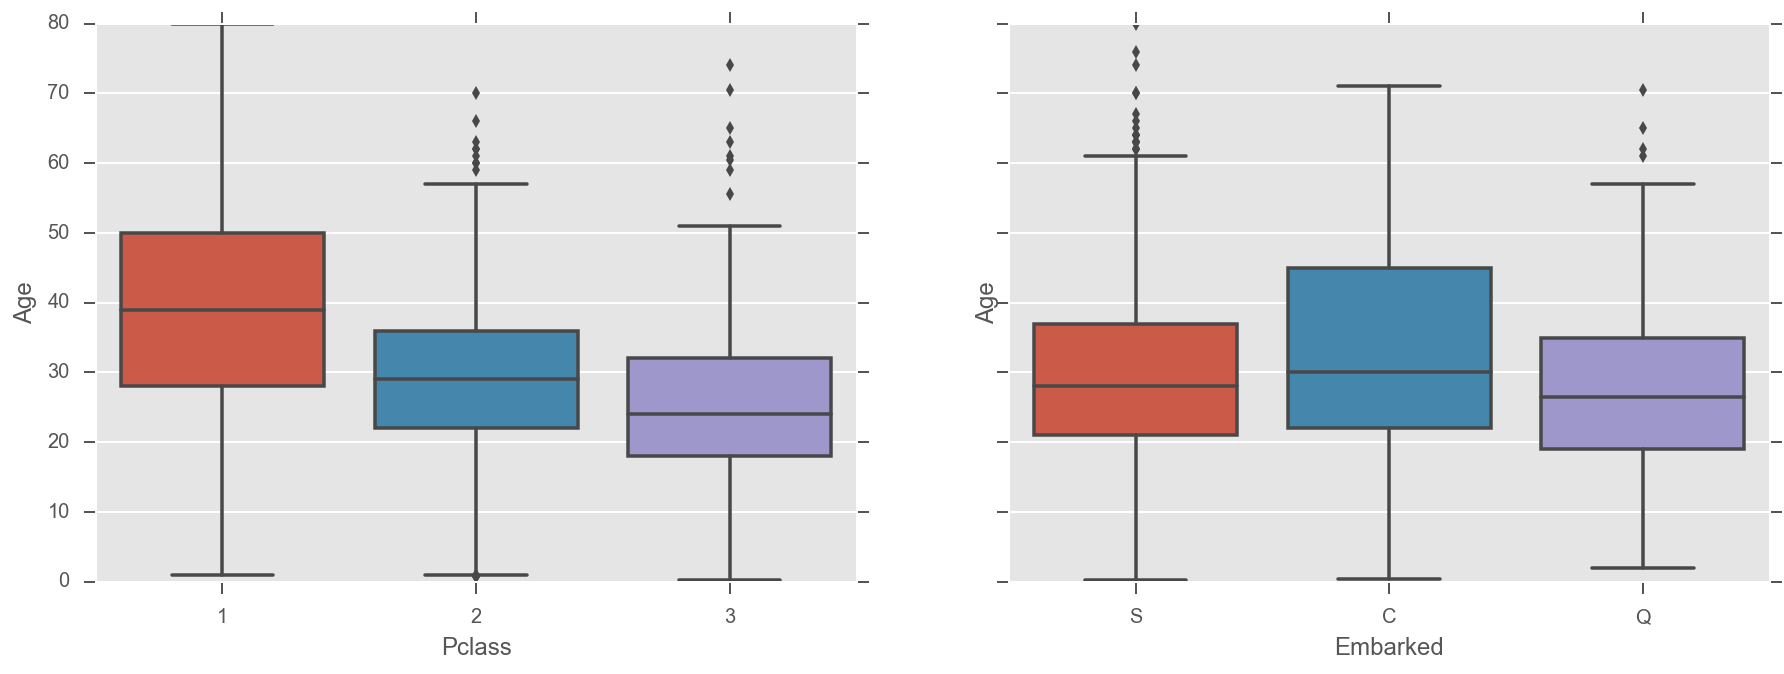

In [12]:
fig, axs = plt.subplots(ncols = 2, sharey = True, figsize = (15,5))
fig1 = sns.boxplot(x='Pclass', y='Age', data=combined, ax=axs[0])
fig2 = sns.boxplot(x='Embarked', y='Age', data=combined, ax=axs[1])

While there is not much difference in distribution of age when grouped by ```Embarked```, the difference in noticeable among different ```Pclass```. This may produce synergy estimating missing values in ```Age``` together with ```Title```. 

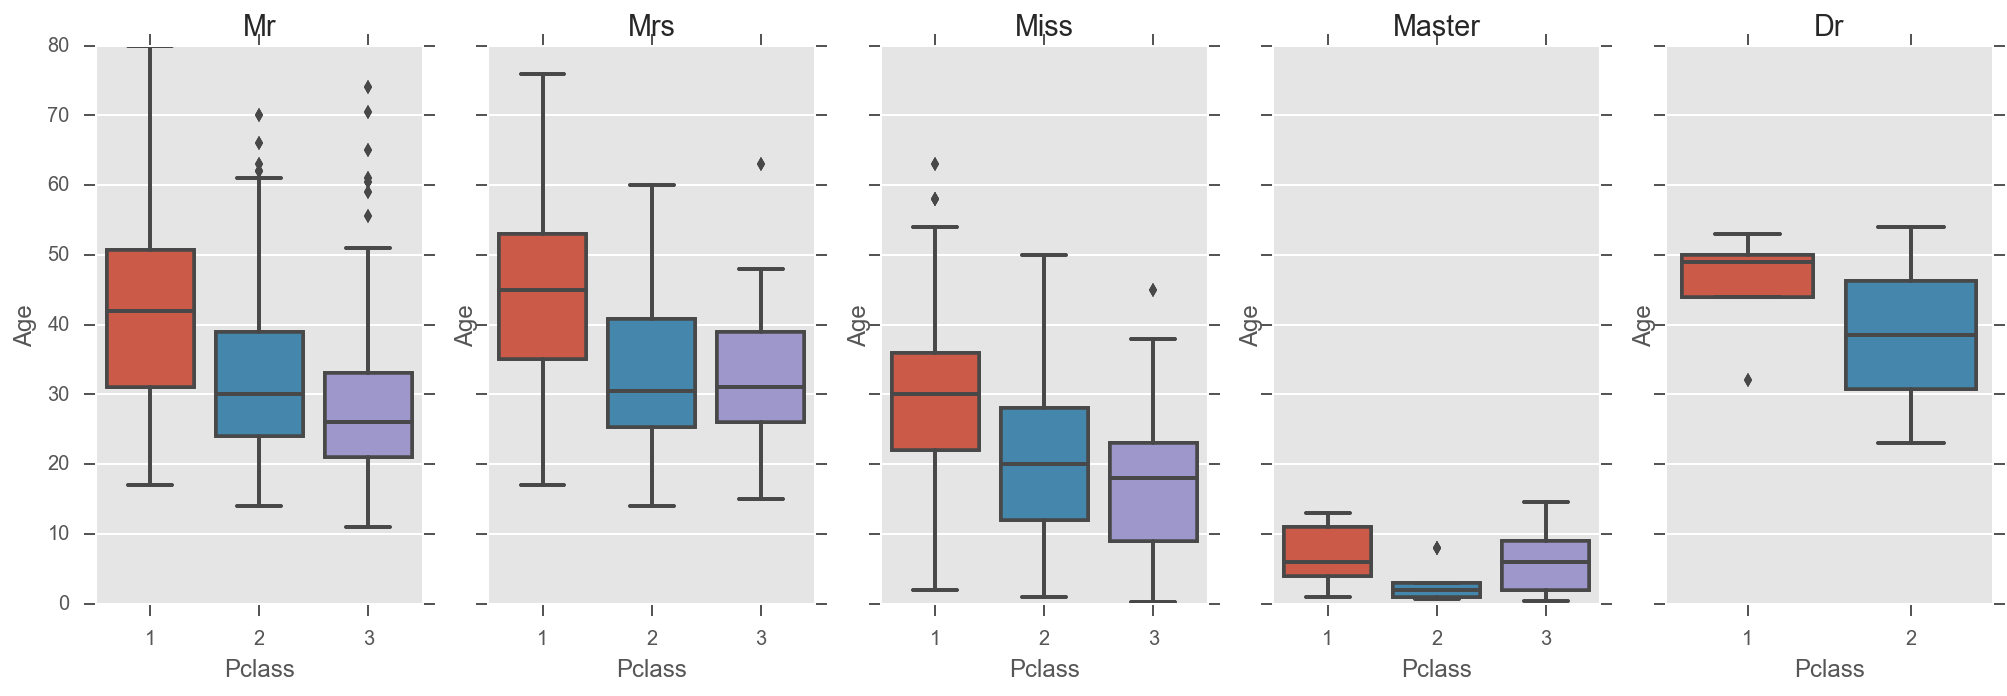

In [13]:
def plotTitlePclass(data):
    df = data
    titles, pclass = df.Title.unique(), df.Pclass.unique()
    pclass.sort()

    fig, axs = plt.subplots(ncols = len(titles), sharey = True, figsize = (17,5))

    for i in range(len(titles)): 
        for j in range(len(pclass)):
            plotdata = df[df['Title'] == titles[i]]
            sns.boxplot(x='Pclass', y='Age', data=plotdata, ax=axs[i]).set_title(titles[i])

plotTitlePclass(combined)

There are distinct ```Age``` distributions from above. We can tell that older passengers are more likely to be classified in higher socio-economic status level. Although the same idea does not hold for `Master` ```Title```d passengers, it is acceptable since `Master` ```Title```d passengers are 14 years old or below. Their socio-economic status are very likely to be inherited by those of their parents. <br><br>

We will use this result to fill in NaNs in ```Age``` column. Since half of the groups have outliers, we will use median which is more robust to the outliers than mean.

In [14]:
def fillAge(data):
    df = data
    nulldf = combined[combined.Age.isnull()]

    for i in nulldf.index:
            title, pclass = nulldf.Title[i], nulldf.Pclass[i]
            df.Age[i] = df[(df['Title'] == title) & (df['Pclass'] == pclass)].Age.median()

fillAge(combined)

In [15]:
combined.isnull().sum()

Age               0
Cabin          1014
Embarked          2
Fare              1
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

Now we have imputed the missing values in ```Age``` column. But we still have much more NaNs to take care of in ```Cabin```, ```Embarked``` and ```Fare```. 

There is a single NaN in ```Fare``` column.

In [16]:
combined[combined.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
1043,60.5,NaN,S,NaN,0,1044,3,male,0,NaN,3701,Mr


This person is a 60 year old male, 'solo' passenger with lower socio-economic status embarked at Southampton('S'). People with similar characteristics are likely to have paid similar fares.

In [17]:
combined[(combined.Pclass == 3) & (combined.Embarked == 'S') & (combined.Parch == 0) & (combined.SibSp == 0)].Fare.describe()

count    323.000000
mean       9.593713
std        8.019326
min        0.000000
25%        7.775000
50%        7.895800
75%        8.050000
max       56.495800
Name: Fare, dtype: float64

Since there are some outliers, I will use median value for the missing ```Fare```.

In [18]:
combined.loc[combined.Fare.isnull(),'Fare'] = 7.895800

There are 2 NaNs in ```Embarked``` Column.

In [19]:
combined[combined.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
61,38.0,B28,NaN,80.0,0,62,1,female,0,1.0,113572,Miss
829,62.0,B28,NaN,80.0,0,830,1,female,0,1.0,113572,Mrs


Since they have same ```Ticket``` number, I am assuming that they are not traveling alone and thus have embarked at the same port. But unfortunately, we no one else share the same ```Ticket```, ```Cabin``` number or ```Fare```. Hence, we will have to make some educated guess.<br><br>Let's subset a group that has ```Cabin``` number starting with 'B'

In [20]:
BstartCabin = pd.DataFrame()
for i in combined[combined.Cabin.notnull()].index:
    if 'B' in combined[combined.Cabin.notnull()].loc[i,"Cabin"]:
        BstartCabin = pd.concat([BstartCabin, combined.loc[i,:]], axis = 1)
BstartCabin = BstartCabin.T

BstartCabin.Embarked.unique()

array(['C', nan, 'S'], dtype=object)

There is no ```Cabin``` number starting with 'B' for those who embarked at Queenstown ('Q').

Referring back to the boxplots above, the Age distributions were pretty similar regardless of Embarking location. So, I think it is better to compare ```Fare``` distributions in port Cherbourg('C') and Southampton('S') to decide where those two passengers embarked.

In [21]:
C_CabinB = BstartCabin[BstartCabin.Embarked == 'C']
S_CabinB = BstartCabin[BstartCabin.Embarked == 'S']

In [22]:
C_CabinB.Fare.astype(float).describe()

count     32.000000
mean     167.461069
std      141.943048
min       27.720800
25%       61.979200
50%       91.079200
75%      262.375000
max      512.329200
Name: Fare, dtype: float64

In [23]:
S_CabinB.Fare.astype(float).describe()

count     31.000000
mean      78.585352
std       57.256123
min        0.000000
25%       38.000000
50%       82.266700
75%       93.500000
max      211.337500
Name: Fare, dtype: float64

Looking at the median ```Fare```s at each port, it seems reasonable to think that the two passengers embarked Southampton('S').

In [24]:
combined.loc[combined.Embarked.isnull(),'Embarked'] = 'S'

Lastly, let's see what we can do with ```Cabin``` column.

In [25]:
combined[combined.Cabin.notnull()].head(8)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,PC 17599,Mrs
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,113803,Mrs
6,54.0,E46,S,51.8625,0,7,1,male,0,0.0,17463,Mr
10,4.0,G6,S,16.7000,1,11,3,female,1,1.0,PP 9549,Miss
11,58.0,C103,S,26.5500,0,12,1,female,0,1.0,113783,Miss
21,34.0,D56,S,13.0000,0,22,2,male,0,1.0,248698,Mr
23,28.0,A6,S,35.5000,0,24,1,male,0,1.0,113788,Mr
27,19.0,C23 C25 C27,S,263.0000,2,28,1,male,3,0.0,19950,Mr


In [26]:
combined[combined.Ticket == '19950']

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
27,19.0,C23 C25 C27,S,263.0,2,28,1,male,3,0.0,19950,Mr
88,23.0,C23 C25 C27,S,263.0,2,89,1,female,3,1.0,19950,Miss
341,24.0,C23 C25 C27,S,263.0,2,342,1,female,3,1.0,19950,Miss
438,64.0,C23 C25 C27,S,263.0,4,439,1,male,1,0.0,19950,Mr
944,28.0,C23 C25 C27,S,263.0,2,945,1,female,3,NaN,19950,Miss
960,60.0,C23 C25 C27,S,263.0,4,961,1,female,1,NaN,19950,Mrs


In [27]:
fam_size = combined.groupby(by = 'Ticket').Title.count()
solo = fam_size[fam_size == 1]
print('There are',solo.count(), 'people traveling alone', '-',
      100 * solo.count()/fam_size.sum(),'% of total number of passengers')

There are 713 people traveling alone - 54.4690603514 % of total number of passengers


From the tables above, we can see that the same ```Ticket```, ```Cabin```, and ```Fare``` are assigned to each family or group member. We might be able to fill in the nulls in ```Cabin``` column by matching ```Ticket``` numbers and the port of embarkation (```Embarked```). However, this could be done only for those who are traveling with family or in group. Since more than half of the passengers are traveling 'solo', I will rather drop the ```Cabin``` column than trying to make a guess.

In [28]:
combined.drop(['Cabin'], axis = 1, inplace = True)

However, we can make use of the duplicated entries to adjust for overstated ```Fare```s. In the example above, ```Fare```s are 263 dollars which is highly unlikely since the average ```Fare``` is between 32 and 35. To see how much each ticket actually cost, we will need to divde the ```Fare``` by the size of the groups.<br><br>
Afterwards, we will drop the ```Ticket``` column since it is another indicator of the port where a passenger ```Embarked```, which ```Cabin``` one stayed and how much one paid (```Fare```). The words and the numbers in each ```Ticket``` does not have much meaning or contribute characterizing the passengers. 

In [29]:
ticketGroup = combined.groupby("Ticket").Fare.count()
ticketGroup = ticketGroup.reset_index().rename(columns = {'Fare' : 'Count'})                                      
combined = pd.merge(combined, ticketGroup, on = 'Ticket', how = 'left', left_index = False)
    
combined.Fare = combined.apply(lambda x: x.Fare / x.Count, axis = 1)
combined.drop(['Ticket'], axis = 1, inplace = True)

combined.head(10)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Count
0,22.0,S,7.25000,0,1,3,male,1,0.0,Mr,1
1,38.0,C,35.64165,0,2,1,female,1,1.0,Mrs,2
2,26.0,S,7.92500,0,3,3,female,0,1.0,Miss,1
3,35.0,S,26.55000,0,4,1,female,1,1.0,Mrs,2
4,35.0,S,8.05000,0,5,3,male,0,0.0,Mr,1
5,26.0,Q,8.45830,0,6,3,male,0,0.0,Mr,1
6,54.0,S,25.93125,0,7,1,male,0,0.0,Mr,2
7,2.0,S,4.21500,1,8,3,male,3,0.0,Master,5
8,27.0,S,3.71110,2,9,3,female,0,1.0,Mrs,3
9,14.0,C,15.03540,0,10,2,female,1,1.0,Mrs,2


In [30]:
combined.isnull().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Title            0
Count            0
dtype: int64

Now we have cleaned the dataset. We will first recover training and testing set from ```combined``` and export as csv files for future use. 

In [31]:
train_set, test_set = combined[:891], combined[891:]
train_set.to_csv('cleaned_train.csv',sep = ',', index = False)
test_set.to_csv('cleaned_test.csv', sep = ',', index = False)